# UBC Scientific Software Seminar

October 13, 2017

* Preprocesing
* Model selection with cross-validation
  * Random forest
  * Gradient boosting classifier
  * Logistic regression
  * K-nearest neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import titanic

In [3]:
data = pd.read_csv('train.csv')
X = titanic.preprocessing(data)
y = data['Survived']

test = pd.read_csv('test.csv')
submit = titanic.preprocessing(test)
submit['Deck_T'] = 0
submit = submit[X.columns]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
Pclass            891 non-null int64
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Fare              891 non-null float64
Gender            891 non-null int64
Alone             891 non-null int64
Title_Dr          891 non-null uint8
Title_Master      891 non-null uint8
Title_Military    891 non-null uint8
Title_Miss        891 non-null uint8
Title_Mr          891 non-null uint8
Title_Mrs         891 non-null uint8
Title_Rev         891 non-null uint8
Title_Royalty     891 non-null uint8
Deck_A            891 non-null uint8
Deck_B            891 non-null uint8
Deck_C            891 non-null uint8
Deck_D            891 non-null uint8
Deck_E            891 non-null uint8
Deck_F            891 non-null uint8
Deck_G            891 non-null uint8
Deck_T            891 non-null uint8
Deck_X            891 non-null uint8
Emb

In [5]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
Pclass            418 non-null int64
Age               418 non-null float64
SibSp             418 non-null int64
Parch             418 non-null int64
Fare              418 non-null float64
Gender            418 non-null int64
Alone             418 non-null int64
Title_Dr          418 non-null uint8
Title_Master      418 non-null uint8
Title_Military    418 non-null uint8
Title_Miss        418 non-null uint8
Title_Mr          418 non-null uint8
Title_Mrs         418 non-null uint8
Title_Rev         418 non-null uint8
Title_Royalty     418 non-null uint8
Deck_A            418 non-null uint8
Deck_B            418 non-null uint8
Deck_C            418 non-null uint8
Deck_D            418 non-null uint8
Deck_E            418 non-null uint8
Deck_F            418 non-null uint8
Deck_G            418 non-null uint8
Deck_T            418 non-null int64
Deck_X            418 non-null uint8
Emb

## Model selection with cross-validation

In [6]:
from sklearn.model_selection import cross_val_score

### Random forests

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/ensemble.html#forest):

> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

Let's import the random forest class from scikit-learn and fit a model to our data.

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [9]:
results = pd.DataFrame(columns=['n_estimators','mean_score'])

for n in [10,100,200,500,1000]:
            clf = RFC(n_estimators=n)
            scores = cross_val_score(clf,X,y,cv=5)
            results = results.append({'n_estimators':n,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False)

,n_estimators,mean_score
1,100.0,0.808133
3,500.0,0.804743
0,10.0,0.800293
2,200.0,0.800249
4,1000.0,0.799138


---

In [12]:
n_estimators = [100,200,1000]
max_features = [5,10,15,20]
results = pd.DataFrame(columns=['n_estimators','max_features','mean_score'])

for n in n_estimators:
    for f in max_features:
        clf = RFC(n_estimators=n,max_features=f)
        scores = cross_val_score(clf,X,y,cv=5)
        results = results.append({'n_estimators':n,'max_features':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False)

,n_estimators,max_features,mean_score
2,100.0,15.0,0.817122
6,200.0,15.0,0.815973
3,100.0,20.0,0.814881
10,1000.0,15.0,0.814862
7,200.0,20.0,0.814856
1,100.0,10.0,0.813701
11,1000.0,20.0,0.812609
5,200.0,10.0,0.811472
9,1000.0,10.0,0.810368
0,100.0,5.0,0.809257


---

In [14]:
n_estimators = [100,200,1000]
max_depth = [2,5,8,10]
results = pd.DataFrame(columns=['n_estimators','max_depth','mean_score'])

for n in n_estimators:
    for m in max_depth:
        clf = RFC(n_estimators=n,max_depth=m)
        scores = cross_val_score(clf,X,y,cv=5)
        results = results.append({'n_estimators':n,'max_depth':m,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False)

,n_estimators,max_depth,mean_score
6,200.0,8.0,0.831660
2,100.0,8.0,0.827184
1,100.0,5.0,0.822690
9,1000.0,5.0,0.822683
11,1000.0,10.0,0.820474
10,1000.0,8.0,0.820468
5,200.0,5.0,0.820436
3,100.0,10.0,0.819382
7,200.0,10.0,0.818239
0,100.0,2.0,0.795685


---

In [16]:
n_estimators = [100,200,1000]
max_depth = [2,5,8,10]
max_features = [5,10,15,20]
results = pd.DataFrame(columns=['n_estimators','max_depth','max_features','mean_score'])

for n in n_estimators:
    for m in max_depth:
        for f in max_features:
            clf = RFC(n_estimators=n,max_depth=m,max_features=f,criterion='entropy')
            scores = cross_val_score(clf,X,y,cv=5)
            results = results.append({'n_estimators':n,'max_depth':m,'max_features':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False)

,n_estimators,max_depth,max_features,mean_score
27,200.0,8.0,20.0,0.840686
11,100.0,8.0,20.0,0.838445
14,100.0,10.0,15.0,0.837316
43,1000.0,8.0,20.0,0.836198
46,1000.0,10.0,15.0,0.835075
47,1000.0,10.0,20.0,0.835068
45,1000.0,10.0,10.0,0.833932
38,1000.0,5.0,15.0,0.833932
15,100.0,10.0,20.0,0.832827
6,100.0,5.0,15.0,0.832821


---

In [8]:
clf_RFC = RFC(n_estimators=200,max_depth=5,max_features=5,criterion='entropy')
clf_RFC.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

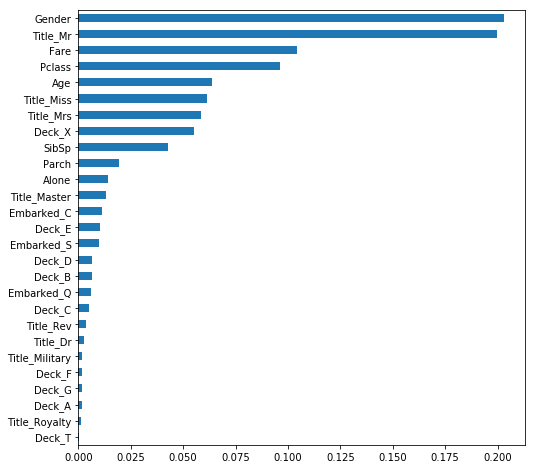

In [9]:
feature_importance = pd.Series(clf_RFC.feature_importances_,index=X.columns)
feature_importance.sort_values().plot(kind='barh',figsize=(8,8));

In [13]:
clf_RFC.fit(X[:700],y[:700])
predictions = clf_RFC.predict(X[700:])
errors = X[700:][predictions != y[700:]]

In [16]:
errors.mean()

Pclass             2.214286
Age               30.696429
SibSp              0.321429
Parch              0.285714
Fare              40.305657
Gender             0.392857
Alone              0.642857
Title_Dr           0.000000
Title_Master       0.035714
Title_Military     0.035714
Title_Miss         0.285714
Title_Mr           0.535714
Title_Mrs          0.107143
Title_Rev          0.000000
Title_Royalty      0.000000
Deck_A             0.000000
Deck_B             0.071429
Deck_C             0.107143
Deck_D             0.035714
Deck_E             0.178571
Deck_F             0.000000
Deck_G             0.000000
Deck_T             0.000000
Deck_X             0.607143
Embarked_C         0.214286
Embarked_Q         0.071429
Embarked_S         0.714286
dtype: float64

In [24]:
predictions_RFC = clf_RFC.predict(submit)
submission_RFC = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': pd.Series(predictions_RFC)})
submission_RFC.to_csv('submission_RFC.csv', index=False)

### Gradient boosting classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [54]:
n_estimators = [100,200,500,1000,2000]
results = pd.DataFrame(columns=['n_estimators','mean_score'])

for n in n_estimators:
        clf = GBC(n_estimators=n)
        scores = cross_val_score(clf,X,y,cv=5)
        results = results.append({'n_estimators':n,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,n_estimators,mean_score
0,100.0,0.832846
1,200.0,0.832815
2,500.0,0.826111
3,1000.0,0.802521
4,2000.0,0.799144


In [56]:
clf_GBC = GBC(n_estimators=100)
clf_GBC.fit(X,y)
predictions_GBC = clf_GBC.predict(submit)
submission_GBC = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': pd.Series(predictions_GBC)})
submission_GBC.to_csv('submission_GBC.csv', index=False)

### Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression as LR

In [30]:
penalty = ['l2','l1']
C = np.arange(1,3,0.1)
fit_intercept = [True,False]
results = pd.DataFrame(columns=['penalty','C','fit_intercept','mean_score'])

for p in penalty:
    for c in C:
        for f in fit_intercept:
            reg = LR(penalty=p,C=c,fit_intercept=f)
            scores = cross_val_score(reg,X,y,cv=5)
            results = results.append({'penalty':p,'C':c,'fit_intercept':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,penalty,C,fit_intercept,mean_score
45,l1,1.2,False,0.829431
47,l1,1.3,False,0.828314
49,l1,1.4,False,0.828314
17,l2,1.8,False,0.828314
23,l2,2.1,False,0.828314
20,l2,2.0,True,0.828314
41,l1,1.0,False,0.828308
43,l1,1.1,False,0.828308
16,l2,1.8,True,0.828308
44,l1,1.2,True,0.827197


In [31]:
reg_LR = LR(C=1.2,penalty='l1',fit_intercept=False)
reg_LR.fit(X,y)

LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
predictions_LR = reg_LR.predict(submit)

In [33]:
submission_LR = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': pd.Series(predictions_LR)})

In [34]:
submission_LR.to_csv('submission_LR.csv', index=False)

### K-nearest neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [37]:
n_neighbors = range(1,20)
results = pd.DataFrame(columns=['n_neighbors','mean_score'])

for n in n_neighbors:
    clf = KNC(n_neighbors=n)
    scores = cross_val_score(clf,X,y,cv=5)
    results = results.append({'n_neighbors':n,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,n_neighbors,mean_score
17,18.0,0.699357
18,19.0,0.695961
15,16.0,0.694843
14,15.0,0.692621
9,10.0,0.691504
16,17.0,0.691472
13,14.0,0.691453
11,12.0,0.688139
12,13.0,0.688095
10,11.0,0.685898
